In [1]:
from utils import configure_environment
configure_environment()


Seed set to 46245


Device set to cuda


In [13]:
from keras.metrics import binary_accuracy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from models import BinaryAttentionClassifier

from callbacks import LogBinaryDiscoveryData
from generators import SubsequenceDiscriminationData

In [5]:
generator = SubsequenceDiscriminationData(characters=2, length=24, batch_size=128)
generator.subsequence

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
model = BinaryAttentionClassifier(generator.length, model_scale=1.0, position_encodings=False)
model.summary()
model.fit(generator, epochs=5000, callbacks=[LogBinaryDiscoveryData(model, topk=len(generator.subsequence), frequency=100)])

Model: "binary_attention_classifier_202"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_202     │ (None, 24)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_202       │ (None, 24, 8)     │         16 │ input_layer_202[… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_202       │ (None, 24, 8)     │          0 │ embedding_202[0]… │
│ (Attention)         │                   │            │ embedding_202[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_202         │ (None, 192)       │          0 │ attention_202[0]… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1010 (Dense)  │ (None, 256)       │     49,408 │ flatten_202[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1011 (Dense)  │ (None, 128)       │     32,896 │ dense_1010[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1012 (Dense)  │ (None, 64)        │      8,256 │ dense_1011[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1013 (Dense)  │ (None, 32)        │      2,080 │ dense_1012[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1014 (Dense)  │ (None, 1)         │         33 │ dense_1013[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 92,689 (362.07 KB)

 Trainable params: 92,689 (362.07 KB)

 Non-trainable params: 0 (0.00 B)

4900            accuracy:	0.640625         		0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 
4800            accuracy:	0.6953125        		1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 
4700            accuracy:	0.640625         		1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 
4600            accuracy:	0.6640625        		1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 
4500            accuracy:	0.5859375        		1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 
4400            accuracy:	0.640625         		0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 
4300            accuracy:	0.640625         		1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 
4200            accuracy:	0.6796875        		1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 
4100            accuracy:	0.6484375        		1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 
4000            accuracy:	0.6796875        		1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 
3900            accuracy:	0.828125         		1 1 1 0 1 0 0 1

In [8]:
model = BinaryAttentionClassifier(generator.length, model_scale=1.0, position_encodings=True)
model.summary()
model.fit(generator, epochs=5000, callbacks=[LogBinaryDiscoveryData(model, topk=len(generator.subsequence), frequency=100)])

Model: "binary_attention_classifier_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 24)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 24, 8)     │         16 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sine_position_enco… │ (None, 24, 8)     │          0 │ embedding_1[0][0] │
│ (SinePositionEncod… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 24, 8)     │          0 │ embedding_1[0][0… │
│                     │                   │            │ sine_position_en… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_1         │ (None, 24, 8)     │          0 │ add[0][0],        │
│ (Attention)         │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 192)       │          0 │ attention_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 256)       │     49,408 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 128)       │     32,896 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 64)        │      8,256 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 32)        │      2,080 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 1)         │         33 │ dense_8[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 92,689 (362.07 KB)

 Trainable params: 92,689 (362.07 KB)

 Non-trainable params: 0 (0.00 B)

4900            accuracy:	0.625            		0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 
4800            accuracy:	0.7734375        		0 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 
4700            accuracy:	0.8515625        		0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 
4600            accuracy:	0.828125         		1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 
4500            accuracy:	0.796875         		0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 
4400            accuracy:	0.890625         		0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 
4300            accuracy:	0.9140625        		1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 
4200            accuracy:	0.96875          		1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 
4100            accuracy:	0.890625         		0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 
4000            accuracy:	0.8671875        		0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 
3900            accuracy:	0.90625          		0 1 1 1 0 0 0 0

In [9]:
def experiment(position_encodings):
	model = BinaryAttentionClassifier(generator.length, position_encodings=position_encodings)
	history = []
	def accuracy_metric(outputs, targets, **kwargs):
		history.append(binary_accuracy(targets, outputs).mean().item())
	model.fit(generator, epochs=5000, callbacks=[accuracy_metric])
	return history

In [ ]:
no_encodings_history = [experiment(position_encodings=False) for _ in range(100)]
encodings_history = [experiment(position_encodings=True) for _ in range(100)]

In [11]:
def lineplot(sequences, color, name):
	data = np.array(sequences)
	mean = data.mean(axis=0)
	std = data.std(axis=0)

	def moving_average(data, window_size=3):
		return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

	window_size = 3
	mean_smoothed = moving_average(mean, window_size)
	std_smoothed = moving_average(std, window_size)
	smoothed_indices = range(len(mean_smoothed))

	sns.lineplot(x=smoothed_indices, y=mean_smoothed, label=name, color=color)
	plt.fill_between(smoothed_indices, 
					mean_smoothed - std_smoothed, 
					mean_smoothed + std_smoothed, 
					color=color, alpha=0.2, label='±1 Std Dev')

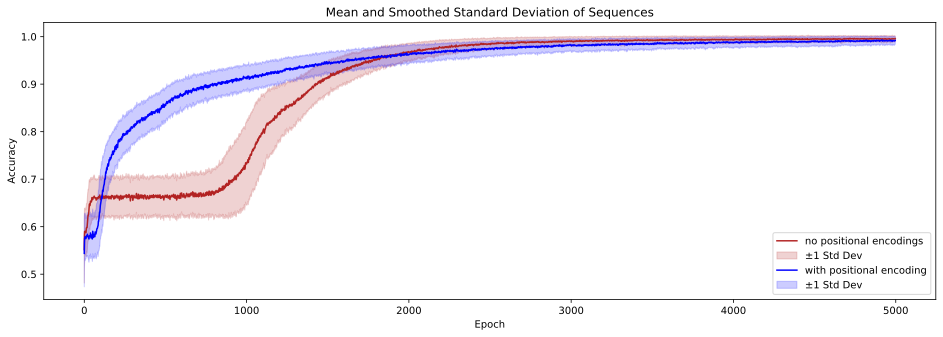

In [12]:
plt.figure(figsize=(16, 5))
lineplot(no_encodings_history, "#b22222", name="no positional encodings")
lineplot(encodings_history, "blue", name="with positional encoding")
plt.title('Mean and Smoothed Standard Deviation of Sequences')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()